# "Analysis of Transfer Learning using STL-10 dataset"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [transfer-learning, vision]
- hide: false
- author: Vinay Kudari
- search_exclude: true
- metadata_key1: deeplearning
- metadata_key2: transfer-learning

### Abstract

In [71]:
import os
import sys
import urllib
import tarfile
from pathlib import Path 
import numpy as np
import matplotlib.pyplot as plt
from torch import tensor
import torch
import torchvision

### Preparing and analysing the dataset

In [18]:
DATA_DIR = Path('/storage/data/stl-10')
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

In [121]:
def download_and_extract():
    dest_directory = DATA_DIR
    
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            download_per = float(count * block_size) / float(total_size) * 100.0
            if round(download_per, 2) == round(int(download_per), 2):
                sys.stdout.write(f'\rDownloading {filename} {int(download_per)}%')
                sys.stdout.flush()
        filepath, _ = urllib.request.urlretrieve(DATA_URL, filepath, reporthook=_progress)
    
    folder_name = filename.split(".")[0]
    if not os.path.exists(DATA_DIR/folder_name):
        print(f'Extracting {filename} into {folder_name}')
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)
        
    print('STL-10 dataset is ready')
    return DATA_DIR/folder_name
        
DATASET_PATH = download_and_extract()

STL-10 dataset is ready


In [100]:
def get_images(path):
    with open(path, 'rb') as f:
        array = np.fromfile(f, dtype=np.uint8)
        images = torch.reshape(tensor(array), (-1, 3, 96, 96))
        return images
    
def get_labels(path):
    with open(path, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels
    
def get_classes(path):
    with open(path, 'r') as f:
         return f.read().splitlines()

classes = get_classes(DATASET_PATH/'class_names.txt')
train_images = get_images(DATASET_PATH/'train_X.bin')
unlabelled_images = get_images(DATASET_PATH/'unlabeled_X.bin')
train_labels = get_labels(DATASET_PATH/'train_y.bin')

train_images.shape, train_labels.shape, unlabelled_images.shape

(torch.Size([5000, 3, 96, 96]), (5000,), torch.Size([100000, 3, 96, 96]))

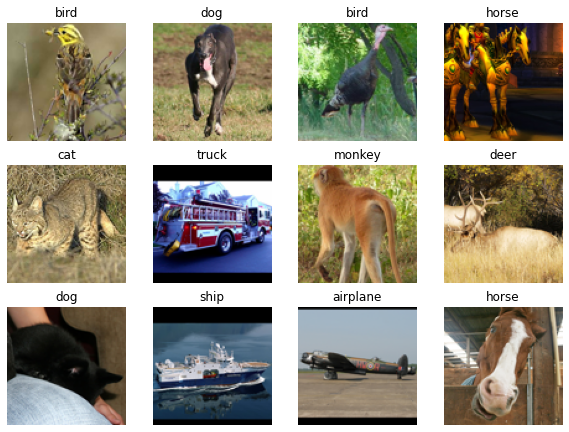

In [125]:
def show_batch(n=12, grid_size=(10, 10)):
    plt.figure(figsize=grid_size) 
    for i in range(n):
        ax = plt.subplot(4,4,i+1) 
        ax.set_title(classes[train_labels[i]-1]) 
        ax.axis('off')
        plt.imshow(train_images[i].permute(2, 1, 0))
    plt.show()
    
show_batch()